In [1]:
import exosystem as es
from matplotlib import pyplot as plt

Warning - Dependencies
The exosystem module depends on the following modules, which you will need to install in your environment if you have not already:
- astropy
- astroquery
- matplotlib
- numpy
- pandas

## Module Structure
The module is built to work with IPAC data, which is accessed via astroquery. Please note that the Exoplanet archive is operated via a combination of smoke signals and carrier pigeons, and queries may take some time to complete.

There are three fundamental object types in the module (Planet, Star, System), each having a set of basic parameters accessible via \<object_name\>.\<parameter_name\>. Planet and Star objects also contain an extended set of parameters stored in a dictionary, as well as an additional dictionary that can custom parameters for new use cases (\<object\>.\<extended_properties\> and \<object\>.\<custom_properties\>).

### Planets
Planets can be created by directly inputting parameters (In Earth units, days, g/cm3), or by specifying the planet name as listed in the Exoplanet archive:

In [2]:
Earth = es.Planet(name = "Earth", mass=1, radius=1, orbital_period=365.2, density=5.52)
K51b = es.Queries.get_planet("Kepler-51 b")

Please note that planet.mass, planet.radius are expected to be given as 'pl_bmasse' and 'pl_rade'. Other mass/radius columns will be stored in the custom_properties attribute and the planet.mass and planet.radius variables will not be set. 

The information stored in a planet object can be accessed by printing the object, or as a dictionary for building dataframes/plotting.

In [3]:
print(K51b)

Name: Kepler-51 b
Host/System name: Kepler-51
Type: Jovian 
Radius: 7.1 earthRad
Mass: 2.1 earthMass
Orbital Period: 45.154 d
Density: 0.03 g / cm3
Detected by: Transit-> Super-puff



In [4]:
K51b.to_dict()

{'pl_letter': 'b',
 'hostname': 'Kepler-51',
 'discoverymethod': 'Transit',
 'pl_orbper': <Quantity 45.154 d>,
 'pl_orbpererr1': <Quantity 0.0002 d>,
 'pl_orbpererr2': <Quantity -0.0002 d>,
 'pl_dens': <Quantity 0.03 g / cm3>,
 'pl_denserr1': <Quantity 0.02 g / cm3>,
 'pl_denserr2': <Quantity -0.01 g / cm3>,
 'pl_rade': <Quantity 7.1 earthRad>,
 'pl_radeerr1': <Quantity 0.3 earthRad>,
 'pl_radeerr2': <Quantity -0.3 earthRad>,
 'pl_bmasse': <Quantity 2.1 earthMass>,
 'pl_bmasseerr1': <Quantity 1.5 earthMass>,
 'pl_bmasseerr2': <Quantity -0.8 earthMass>,
 'base_class': 'Jovian',
 'Super-puff': True,
 'near-Super-puff': False,
 'Hot Jupiter': False,
 'USP': False,
 'objectid': '3.362',
 'pl_name': 'Kepler-51 b',
 'hostid': '2.41042',
 'hd_name': '',
 'hip_name': '',
 'tic_id': 'TIC 27846348',
 'disc_pubdate': '2013-01',
 'disc_year': 2012,
 'disc_method': 'tran',
 'disc_locale': 'Space',
 'disc_facility': 'Kepler',
 'disc_instrument': 'Kepler CCD Array',
 'disc_telescope': '0.95 m Kepler 

Select parameters, such as mass, radius, and orbital period, can be directly accessed:

In [5]:
print(f"Kepler-51 b mass: {K51b.mass}")
print(f"Kepler-51 b radius: {K51b.radius}")
print(f"Kepler-51 b orbital period: {K51b.orbital_period}")

Kepler-51 b mass: 2.1 earthMass
Kepler-51 b radius: 7.1 earthRad
Kepler-51 b orbital period: 45.154 d


The *get_references()* method allows convenient viewing of references/sources for planetary parameters taken from the Exoplanet archive:

In [6]:
K51b.get_references()[:5]

,Reference
Name,
ra,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
dec,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
glon,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
glat,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
elon,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...


### Stars
Star objects are similar to Planet objects, however they have slightly different parameter sets. The Queries.get_star method uses the default parameter set corresponding to each star in the Stellarhosts table, unless table='pscomppars' is specified. 

In [7]:
s51Peg = es.Queries.get_star("51 Peg", table='pscomppars')

In [8]:
print(s51Peg)

Name: 51 Peg
Host/Effective Temp: 5758.0 K
Type: G5V
Luminosity: 1.4487718535447616 solLum
Radius: 1.17561 solRad
Mass: 1.04 Msun
age: 10.0 Gyr
Use <Star>.get_references() to view sources/references



Stars that have a gaia_id listed on the exoplanet archive also contain an *id_map* (pd.DataFrame). This may be unreliable for stars with differing Gaia DR2 and DR3 IDs.

In [9]:
s51Peg.id_map

,TIC,2MASS,HIP,Gaia DR2,Gaia DR3
0,TIC 139298196,2MASS J22572795+2046077,HIP 113357,Gaia DR2 2835207319109249920,Gaia DR3 2835207319109249920


In [10]:
s51Peg.get_references()

,Reference
Name,
ra,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
dec,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
glon,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
glat,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
elon,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
...,...
sy_jmag,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
sy_hmag,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...
sy_kmag,TICv8 (https://ui.adsabs.harvard.edu/abs/2019A...


### Systems
Systems are objects which contain a single Star (circumbinary systems will be treated differently in future updates), and an array of planets.

Systems can be created by manually assigning the planets and star:

(Note that the following solar system objects are included as prefabs in the module by default, and can be accessed as *es.Jupiter*, *es.Sun*, etc.)

In [11]:
Sun = es.Star(name="Sun", properties={'st_dens':1.41, 'st_spectype':"G2V", 'st_mass':1, 'st_rad':1, 'st_teff':5778, 'st_met':0, 'st_lum':0, 'st_age':4.603}, force_stellar_params=False)
Mercury = es.Planet(name = "Mercury", mass=0.0553, radius=0.383, orbital_period=88.0, density=5.427)
Venus = es.Planet(name = "Venus", mass=0.815, radius=0.949, orbital_period=224.7, density=5.243)
Earth = es.Planet(name = "Earth", mass=1, radius=1, orbital_period=365.2, density=5.52)
Mars = es.Planet(name = "Mars", mass=0.107, radius=0.532, orbital_period=687.0, density=3.9335)
Jupiter = es.Planet(name = "Jupiter", mass=317.8, radius=11.21, orbital_period=4331, density=1.326)
Saturn = es.Planet(name = "Saturn", mass=95.2, radius=9.45, orbital_period=10747, density=0.69)
Uranus = es.Planet(name = "Uranus", mass=14.5, radius=4.01, orbital_period=30589, density=1.27)
Neptune = es.Planet(name = "Neptune", mass=17.1, radius=3.88/2, orbital_period=59800, density=1.638)
Pluto = es.Planet(name = "Pluto?", mass=0.0022, radius=0.187/2, orbital_period=90560, density=1.853)
solar_system = es.System("Solar System", star=Sun, planets=[Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto], binary=False)

Or by using *Queries.build_system(\<system name\>)*

(<Figure size 1000x200 with 1 Axes>, <Axes: >)

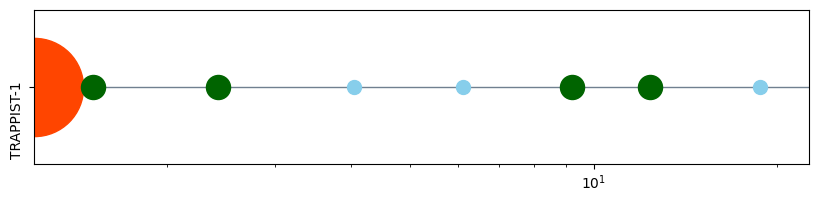

In [12]:
trappist1 = es.Queries.build_system("TRAPPIST-1")
trappist1.plot()

System information can be accessed by printing the system. The to_pandas() method returns a dataframe containing each a row for each planet.

In [22]:
print(trappist1)

TRAPPIST-1
-------------------
Spectral type: M7.5e
Planets(7):
TRAPPIST-1 b (super-Earth): R=1.116 earthRad, M=1.374 earthMass, P=1.510826 d
TRAPPIST-1 c (super-Earth): R=1.097 earthRad, M=1.308 earthMass, P=2.421937 d
TRAPPIST-1 d (sub-Earth): R=0.788 earthRad, M=0.388 earthMass, P=4.049219 d
TRAPPIST-1 e (sub-Earth): R=0.92 earthRad, M=0.692 earthMass, P=6.101013 d
TRAPPIST-1 f (super-Earth): R=1.045 earthRad, M=1.039 earthMass, P=9.20754 d
TRAPPIST-1 g (super-Earth): R=1.129 earthRad, M=1.321 earthMass, P=12.352446 d
TRAPPIST-1 h (sub-Earth): R=0.755 earthRad, M=0.326 earthMass, P=18.772866 d
To view planetary parameter sources use <Planet Obj>.get_references()

Extended Analytics
---------------------
Mean Motion Resonance (MMR) Information:
Planet 1 and 0 are within 3.817% of 5:3 resonance
(index starts at 0)
Planet 1 and 0 are within 0.191% of 8:5 resonance
(index starts at 0)
Planet 2 and 1 are within 0.314% of 5:3 resonance
(index starts at 0)
Planet 2 and 1 are within 4.463% 

In [23]:
trappist1.to_pandas()

,pl_letter,hostname,discoverymethod,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_dens,pl_denserr1,pl_denserr2,pl_rade,...,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_ndispec,sky_coord.ra,sky_coord.dec
TRAPPIST-1 b,b,TRAPPIST-1,Transit,1.510826,0.000006,-0.000006,5.441939,0.264654,-0.275681,1.116,...,0.928,NaN,NaN,0.0,,0.928,NaN,0,346.626392,-5.043462
TRAPPIST-1 c,c,TRAPPIST-1,Transit,2.421937,0.000018,-0.000018,5.463993,0.220545,-0.237085,1.097,...,1.270,NaN,NaN,0.0,,1.27,NaN,0,346.626392,-5.043462
TRAPPIST-1 d,d,TRAPPIST-1,Transit,4.049219,0.000026,-0.000026,4.366784,0.154381,-0.165408,0.788,...,1.790,NaN,NaN,0.0,,1.79,NaN,0,346.626392,-5.043462
TRAPPIST-1 e,e,TRAPPIST-1,Transit,6.101013,0.000035,-0.000035,4.901605,0.165408,-0.181949,0.920,...,2.350,NaN,NaN,0.0,,2.35,NaN,0,346.626392,-5.043462
TRAPPIST-1 f,f,TRAPPIST-1,Transit,9.207540,0.000032,-0.000032,5.022904,0.137840,-0.159895,1.045,...,3.100,NaN,NaN,0.0,,3.1,NaN,0,346.626392,-5.043462
TRAPPIST-1 g,g,TRAPPIST-1,Transit,12.352446,0.000054,-0.000054,5.055986,0.137840,-0.159895,1.129,...,3.770,NaN,NaN,0.0,,3.77,NaN,0,346.626392,-5.043462
TRAPPIST-1 h,h,TRAPPIST-1,Transit,18.772866,0.000214,-0.000214,4.162780,0.325303,-0.303249,0.755,...,4.980,NaN,NaN,0.0,,4.98,NaN,0,346.626392,-5.043462


## Plotting and visualization
The main intended use case for this module is analysis of systems through visualization. Several plotting and data-set building methods are implemented for this purpose. Examples are shown below.

### Example: Plotting the solar system

In [13]:
home = es.solar_system

(<Figure size 1000x200 with 1 Axes>, <Axes: >)

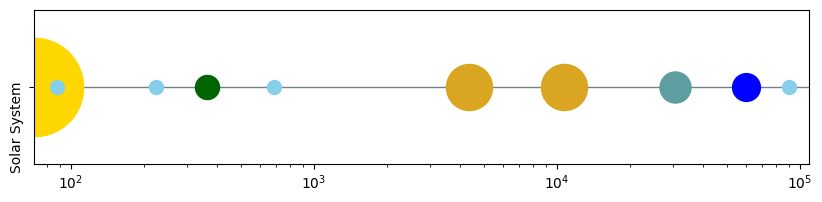

In [14]:
home.plot()

Plot options can be specified using a dictionary. Available options are:
- show_labels (Default False) If True, writes the pl_letter onto each plotted planet.
- show_HZ (Default False) Display the Kopparapu+2014 habitable zone estimate
- show_star (Default True) Plot star on the left of axis
- show_resonance (Default False) If True, annotates resonances
- show_system_name (Default True) Display the system name as the y-label

(<Figure size 1000x200 with 1 Axes>, <Axes: >)

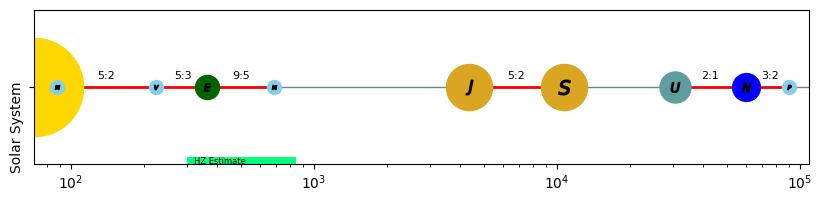

In [15]:
home.plot(options={'show_labels':True, 'show_HZ':True, 'show_resonance': True})

### Example: plotting a system with super-puffs
This is an example to show that super-puffs are plotted in the style of <a href=http://arxiv.org/abs/2501.08191>Howe et al. 2025</a>

(<Figure size 1000x200 with 1 Axes>, <Axes: >)

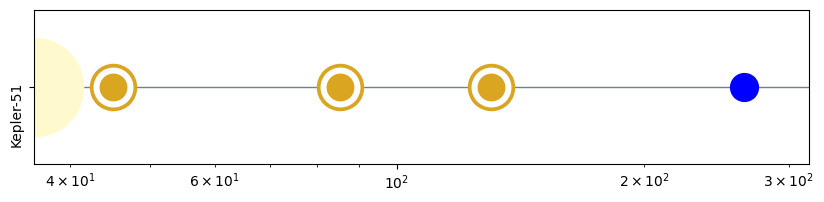

In [16]:
k51 = es.Queries.build_system("Kepler-51")
k51.plot()

System visualization plots can also be added to a *plt.subplots()* layout by passing the Axes object to the plot() method

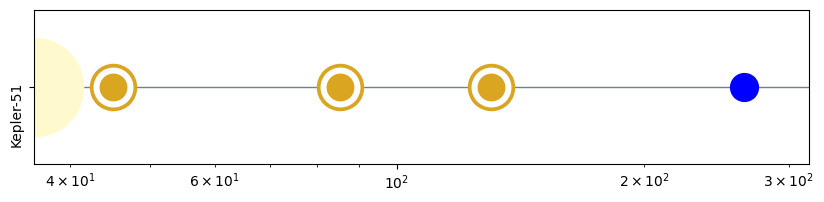

In [17]:
fig, ax = plt.subplots(figsize = (10,2))
k51.plot(ax)

### Example: Classify planets based on near-resonance
System objects automatically identify $j:j-k$ mean motion resonance pairs among adjacent planets, **assuming circular orbits**. 
This is reflected in the planet object as the \<planet\>.is_resonant flag. Note that planets not contained within a system object are not checked for resonance. To be considered resonant with a neighbor, the periods must be within $5%$ of a $j:j-k$ resonance up to $j=7,\ k=j-1$. Near-resonances of up to $j=9$ are stored in the *System.resonances* attribute as a dictionary.

In [18]:
import pandas as pd
systems = []
for i in range(0,10):
    systems.append(es.Queries.get_random_system())
planets = pd.DataFrame()
for sys in systems:
    sysobj = es.Queries.build_system(sys)
    planets = pd.concat([planets, sysobj.to_pandas()])

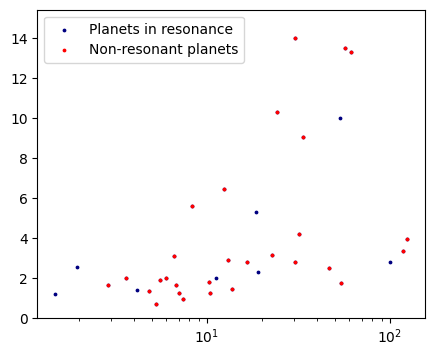

In [19]:
resonant_planets = planets[planets['is_resonant'] == True]
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(planets['pl_orbper'], planets['pl_rade'], color='navy', label='Planets in resonance', s=3)
ax.scatter(resonant_planets['pl_orbper'], resonant_planets['pl_rade'], color='red', label='Non-resonant planets', s=3)
ax.set_ylim([0,1.1*max(resonant_planets['pl_rade'])])
ax.set_xscale('log')
ax.legend()

### Example: Stacked orbital period plots

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

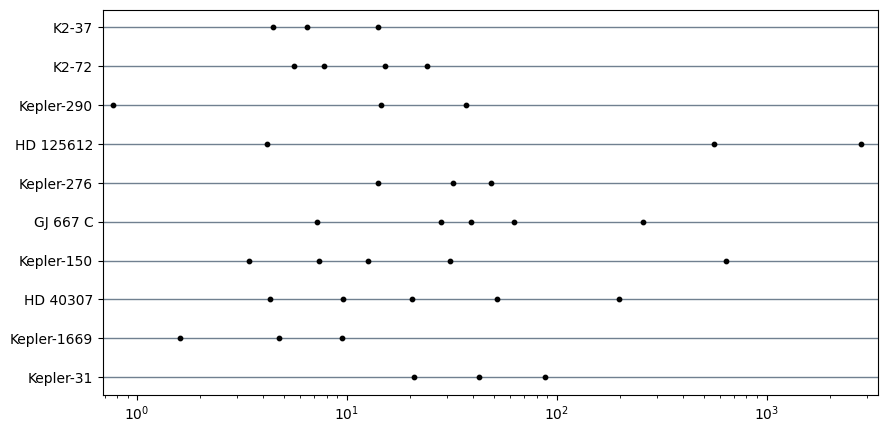

In [20]:
system_objects = []
for i in range(0,10):
    system_objects.append(es.Queries.build_system(es.Queries.get_random_system()))
    
es.Queries.stacked_sysplot(system_objects)

### Demographic plots
The Queries.demo_plot() method is intended to generate plots similar to the plots on <a href=https://exoplanetarchive.ipac.caltech.edu/exoplanetplots>this page</a>

Notes:
- The *x* and *y* arguments must be the names of columns in the specified table (the default is 'pscomppars')
- the *where* argument is directly passed as the WHERE component of the ADQL query, and must be formatted as such. Examples are provided below. 
- Pyplot arguments (e.g. label, marker size, color, etc) can be passed directly to the demo_plot() method
- If a matplotlib Axes object is given as an argument, demo_plot will plot directly to the provided axis. This allows you to use tools like ax.set_xlim() and ax.set_title(), as well as plotting additional datapoints on top of the result. This also allows multiple datasets to be plotted for comparison, as is shown below. 
- If no axes object is given, demo_plot() will create and return a fig, ax object pair. 

Text(0.5, 1.0, 'Transit vs Microlensing Detections (Mass-Period)')

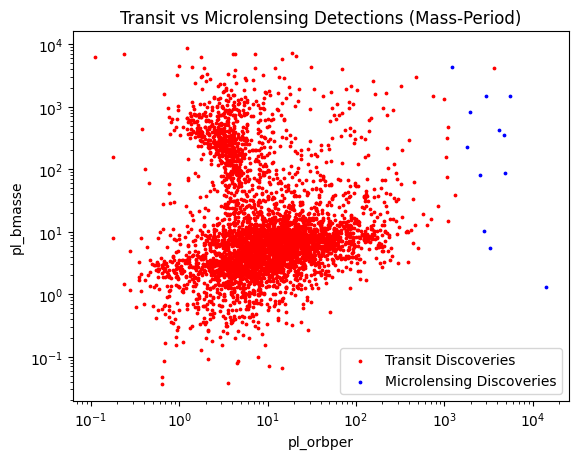

In [21]:
fig, ax = plt.subplots()
es.Queries.demo_plot(ax=ax, x='pl_orbper', y='pl_bmasse', color='red', s=3, where="discoverymethod LIKE 'Transit'", label='Transit Discoveries')
es.Queries.demo_plot(ax=ax, x='pl_orbper', y='pl_bmasse', color='blue', s=3, where="discoverymethod LIKE 'Microlensing'", label='Microlensing Discoveries')
ax.legend()
ax.set_title('Transit vs Microlensing Detections (Mass-Period)')

## Where is this going?
I developed this primarily to help speed up my own work, and I will continue to add things I find useful to the publically available version. However, I would like to make this more useful to others. If there are any relevant functions that you would find useful, feel free to reach out to me at ntmarston@gmail.com. Currently, I am planning on adding the following functions (in no particular order):
- Classify systems based on the framework of <a href=http://arxiv.org/abs/2501.08191>Howe et al. 2025</a>
- Cache query results to reduce runtime
- Implement automatic analysis of system dynamics, including gap complexity metrics, eccentric resonances, non-resonant planets within a resonant system, etc
- Implement RV and Transit synthesis tools for Transit/RV injection
- Implement features intended for use with the upcoming Gaia releases, which are expected to uncover several thousand planet candidates